In [197]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:

df = pd.read_csv(r'../data/countries.csv')

print(df.head())
print(df.info())

               Country                    Region  Population (millions)   HDI  \
0          Afghanistan  Middle East/Central Asia                  29.82  0.46   
1              Albania   Northern/Eastern Europe                   3.16  0.73   
2              Algeria                    Africa                  38.48  0.73   
3               Angola                    Africa                  20.82  0.52   
4  Antigua and Barbuda             Latin America                   0.09  0.78   

  GDP per Capita  Cropland Footprint  Grazing Footprint  Forest Footprint  \
0        $614.66                0.30               0.20              0.08   
1      $4,534.37                0.78               0.22              0.25   
2      $5,430.57                0.60               0.16              0.17   
3      $4,665.91                0.33               0.15              0.12   
4     $13,205.10                 NaN                NaN               NaN   

   Carbon Footprint  Fish Footprint  ...  Cropland

In [199]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Country                            0
Region                             0
Population (millions)              0
HDI                               16
GDP per Capita                    15
Cropland Footprint                15
Grazing Footprint                 15
Forest Footprint                  15
Carbon Footprint                  15
Fish Footprint                    15
Total Ecological Footprint         0
Cropland                          15
Grazing Land                      15
Forest Land                       15
Fishing Water                     15
Urban Land                        15
Total Biocapacity                  0
Biocapacity Deficit or Reserve     0
Earths Required                    0
Countries Required                 0
Data Quality                       0
dtype: int64


In [200]:
#Full summary of missing values for all columns
missing_summary = df.isna().sum()

#Print all columns with their missing value counts
print("Full missing value report:\n", missing_summary)

#Filter only columns that have missing values
missing_columns = missing_summary[missing_summary > 0]
print("\nColumns with missing values:\n", missing_columns)

Full missing value report:
 Country                            0
Region                             0
Population (millions)              0
HDI                               16
GDP per Capita                    15
Cropland Footprint                15
Grazing Footprint                 15
Forest Footprint                  15
Carbon Footprint                  15
Fish Footprint                    15
Total Ecological Footprint         0
Cropland                          15
Grazing Land                      15
Forest Land                       15
Fishing Water                     15
Urban Land                        15
Total Biocapacity                  0
Biocapacity Deficit or Reserve     0
Earths Required                    0
Countries Required                 0
Data Quality                       0
dtype: int64

Columns with missing values:
 HDI                   16
GDP per Capita        15
Cropland Footprint    15
Grazing Footprint     15
Forest Footprint      15
Carbon Footprint      15
F

In [201]:
#Clean and convert 'GDP per Capita' to numeric
df["GDP per Capita"] = df["GDP per Capita"].replace('[\$,]', '', regex=True)
df["GDP per Capita"] = pd.to_numeric(df["GDP per Capita"], errors='coerce')

#List the columns to fill using regional mean
columns_to_fill = [
    "HDI", "GDP per Capita", "Cropland Footprint", "Grazing Footprint", "Forest Footprint",
    "Carbon Footprint", "Fish Footprint", "Cropland", "Grazing Land", "Forest Land",
    "Fishing Water", "Urban Land"]

#Fill missing values by region mean
for col in columns_to_fill:
    df[col] = df.groupby("Region")[col].transform(lambda x: x.fillna(x.mean()))

In [202]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Country                           0
Region                            0
Population (millions)             0
HDI                               0
GDP per Capita                    0
Cropland Footprint                0
Grazing Footprint                 0
Forest Footprint                  0
Carbon Footprint                  0
Fish Footprint                    0
Total Ecological Footprint        0
Cropland                          0
Grazing Land                      0
Forest Land                       0
Fishing Water                     0
Urban Land                        0
Total Biocapacity                 0
Biocapacity Deficit or Reserve    0
Earths Required                   0
Countries Required                0
Data Quality                      0
dtype: int64


In [203]:
#the average Human Development Index (HDI) for each region
avg_hdi_by_region = df.groupby("Region")["HDI"].mean()
print(avg_hdi_by_region)

Region
Africa                      0.515714
Asia-Pacific                0.687500
European Union              0.864615
Latin America               0.720433
Middle East/Central Asia    0.726957
North America               0.910000
Northern/Eastern Europe     0.788333
Name: HDI, dtype: float64


In [204]:
#Computes the total population (in millions) in each region
total_pop_by_region = df.groupby("Region")["Population (millions)"].sum()
print(total_pop_by_region)

Region
Africa                      1034.640
Asia-Pacific                3880.170
European Union               503.980
Latin America                605.410
Middle East/Central Asia     405.586
North America                352.400
Northern/Eastern Europe      238.180
Name: Population (millions), dtype: float64


In [205]:
#Cleans and converts GDP per Capita to float, then calculates the regional average
df["GDP per Capita"] = df["GDP per Capita"].replace('[\$,]', '', regex=True).astype(float)
avg_gdp_by_region = df.groupby("Region")["GDP per Capita"].mean()
print(avg_gdp_by_region)

Region
Africa                       2668.142400
Asia-Pacific                12192.205000
European Union              35819.146923
Latin America                8376.773125
Middle East/Central Asia    16368.722273
North America               57498.900000
Northern/Eastern Europe     21373.183333
Name: GDP per Capita, dtype: float64


In [206]:
#the top 10countries with the highest total carbon footprint
top_carbon = df.groupby("Country")["Carbon Footprint"].sum().nlargest(10)
print(top_carbon)

Country
Luxembourg                  12.65
Qatar                        9.57
Kuwait                       6.89
Trinidad and Tobago          6.89
United Arab Emirates         6.37
Bahrain                      6.19
Singapore                    5.91
United States of America     5.90
Oman                         5.80
Bermuda                      5.45
Name: Carbon Footprint, dtype: float64


In [207]:
#the average cropland usage footprint per region
avg_cropland_by_region = df.groupby("Region")["Cropland Footprint"].mean()
print(avg_cropland_by_region)

Region
Africa                      0.389600
Asia-Pacific                0.598667
European Union              0.982917
Latin America               0.450000
Middle East/Central Asia    0.598696
North America               1.295000
Northern/Eastern Europe     0.708182
Name: Cropland Footprint, dtype: float64


In [208]:
#Sums the total ecological biocapacity available in each region
total_biocapacity_by_region = df.groupby("Region")["Total Biocapacity"].sum()
print(total_biocapacity_by_region)

Region
Africa                      117.66
Asia-Pacific                 93.29
European Union               94.87
Latin America               372.98
Middle East/Central Asia     22.41
North America                19.90
Northern/Eastern Europe      34.59
Name: Total Biocapacity, dtype: float64


In [209]:
#the 10 countries with the most negative biocapacity balance (deficit)
top_deficit = df.groupby("Country")["Biocapacity Deficit or Reserve"].min().nsmallest(10)
print(top_deficit)

Country
Luxembourg             -14.14
Aruba                  -11.31
Qatar                   -9.56
Singapore               -7.92
Kuwait                  -7.58
United Arab Emirates    -7.37
Bahrain                 -6.91
Montserrat              -6.42
Trinidad and Tobago     -6.36
Belgium                 -6.25
Name: Biocapacity Deficit or Reserve, dtype: float64


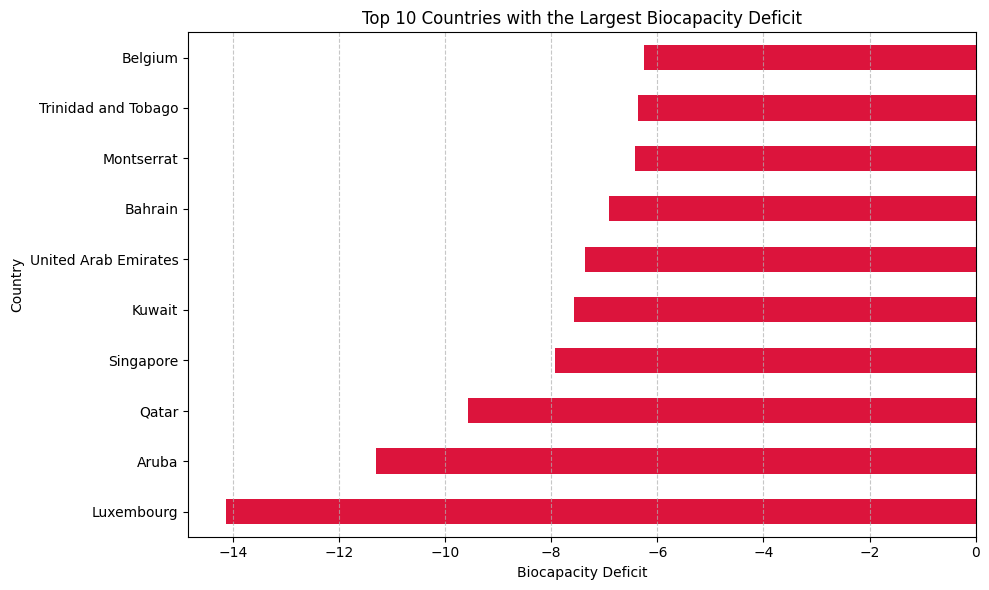

In [210]:
plt.figure(figsize=(10, 6))
top_deficit.plot(kind='barh', color='crimson')
plt.title("Top 10 Countries with the Largest Biocapacity Deficit")
plt.xlabel("Biocapacity Deficit")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [211]:
#how average carbon footprint varies by population size
carbon_by_pop = df.groupby("Population (millions)")["Carbon Footprint"].mean()
print(carbon_by_pop.head())

Population (millions)
0.00    1.709394
0.01    1.514000
0.03    1.709394
0.05    3.340000
0.06    4.505000
Name: Carbon Footprint, dtype: float64


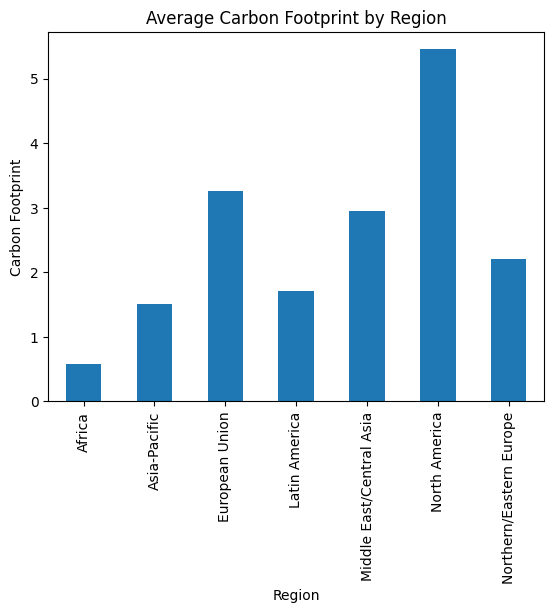

In [212]:
df.groupby("Region")["Carbon Footprint"].mean().plot(kind="bar")
plt.title("Average Carbon Footprint by Region")
plt.ylabel("Carbon Footprint")
plt.show()

In [213]:
#how fish footprint varies with HDI levels
fish_by_hdi = df.groupby("HDI")["Fish Footprint"].mean()
print(fish_by_hdi.head())

HDI
0.34    0.020000
0.37    0.020000
0.39    0.012500
0.40    0.150000
0.41    0.036667
Name: Fish Footprint, dtype: float64


In [214]:
#the percentage of countries with a biocapacity deficit in each region
deficit_by_region = df[df["Biocapacity Deficit or Reserve"] < 0].groupby("Region")["Country"].count() / df.groupby("Region")["Country"].count() * 100
print(deficit_by_region)

Region
Africa                       59.615385
Asia-Pacific                 69.696970
European Union               84.615385
Latin America                61.538462
Middle East/Central Asia    100.000000
North America                66.666667
Northern/Eastern Europe      83.333333
Name: Country, dtype: float64


In [215]:
#the relationship between income level and forest usage footprint
forest_by_gdp = df.groupby("GDP per Capita")["Forest Footprint"].mean()
print(forest_by_gdp.head())

GDP per Capita
276.69    0.45
338.63    0.51
379.38    0.46
397.38    0.75
410.91    0.26
Name: Forest Footprint, dtype: float64


In [216]:
#Converts data quality to numeric and calculates average per region
df["Data Quality"] = pd.to_numeric(df["Data Quality"], errors='coerce')
avg_quality_by_region = df.groupby("Region")["Data Quality"].mean()
print(avg_quality_by_region)

Region
Africa                      5.350000
Asia-Pacific                5.500000
European Union              5.333333
Latin America               4.791667
Middle East/Central Asia    5.583333
North America               5.500000
Northern/Eastern Europe     5.416667
Name: Data Quality, dtype: float64


In [217]:
#countries based on HDI ranges and counts how many fall into each bin
hdi_bins = pd.cut(df["HDI"], bins=[0, 0.5, 0.7, 1])
hdi_dist = df.groupby(hdi_bins, observed=False)["Country"].count()
print(hdi_dist)


HDI
(0.0, 0.5]     33
(0.5, 0.7]     52
(0.7, 1.0]    103
Name: Country, dtype: int64


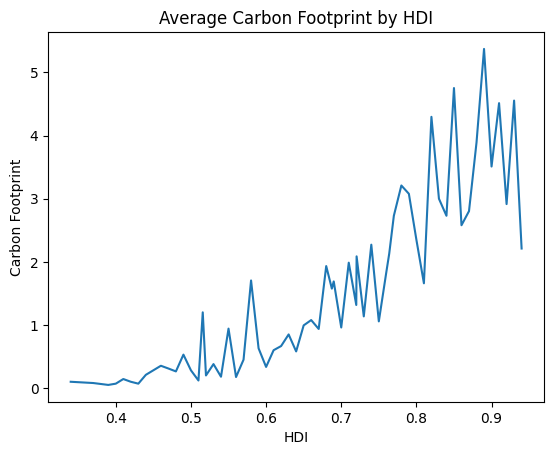

In [218]:
df.groupby("HDI")["Carbon Footprint"].mean().plot(kind="line")
plt.title("Average Carbon Footprint by HDI")
plt.ylabel("Carbon Footprint")
plt.show()

In [219]:
#Shows how the average number of Earths required changes with population size
earths_by_pop = df.groupby("Population (millions)")["Earths Required"].mean()
print(earths_by_pop.head())

Population (millions)
0.00    4.490
0.01    1.445
0.03    1.650
0.05    2.850
0.06    3.295
Name: Earths Required, dtype: float64


In [220]:
#Sums cropland footprint for each region
total_cropland_by_region = df.groupby("Region")["Cropland Footprint"].sum()
print(total_cropland_by_region)

Region
Africa                      20.259200
Asia-Pacific                19.756000
European Union              25.555833
Latin America               17.550000
Middle East/Central Asia    13.770000
North America                3.885000
Northern/Eastern Europe      8.498182
Name: Cropland Footprint, dtype: float64


In [221]:
#the top 10 countries with the largest grazing land footprint
top_grazing = df.groupby("Country")["Grazing Footprint"].sum().nlargest(10)
print(top_grazing)

Country
Mongolia      3.47
Bolivia       1.69
Mauritania    1.20
Paraguay      1.10
Bahamas       1.05
Uruguay       0.98
Botswana      0.89
Brazil        0.85
Argentina     0.79
Luxembourg    0.76
Name: Grazing Footprint, dtype: float64


In [222]:
#average forest footprint per region
forest_by_region = df.groupby("Region")["Forest Footprint"].mean()
print(forest_by_region)

Region
Africa                      0.310000
Asia-Pacific                0.374000
European Union              0.641667
Latin America               0.360909
Middle East/Central Asia    0.160870
North America               0.935000
Northern/Eastern Europe     0.460909
Name: Forest Footprint, dtype: float64


In [223]:
#how carbon footprint correlates with data quality ratings
carbon_by_quality = df.groupby("Data Quality")["Carbon Footprint"].mean()
print(carbon_by_quality)

Data Quality
2.0    1.488729
4.0    1.125455
5.0    1.844242
6.0    1.492500
Name: Carbon Footprint, dtype: float64


In [224]:
#the link between available biocapacity and ecological pressure (countries required)
countries_by_biocap = df.groupby("Total Biocapacity")["Countries Required"].mean()
print(countries_by_biocap.head())

Total Biocapacity
0.05    159.47
0.13     44.05
0.18     20.18
0.19     19.81
0.21      9.91
Name: Countries Required, dtype: float64


In [225]:
#how many countries have a carbon footprint exceeding 1 Earth
high_carbon = len(df[df["Carbon Footprint"] > 1])
print(f"Countries with Carbon Footprint > 1: {high_carbon}")

Countries with Carbon Footprint > 1: 109


In [226]:
#the percentage of countries in each region that have a biocapacity surplus
surplus_by_region = df[df["Biocapacity Deficit or Reserve"] > 0].groupby("Region")["Country"].count() / df.groupby("Region")["Country"].count() * 100
print(surplus_by_region)

Region
Africa                      38.461538
Asia-Pacific                30.303030
European Union              15.384615
Latin America               38.461538
Middle East/Central Asia          NaN
North America               33.333333
Northern/Eastern Europe     16.666667
Name: Country, dtype: float64


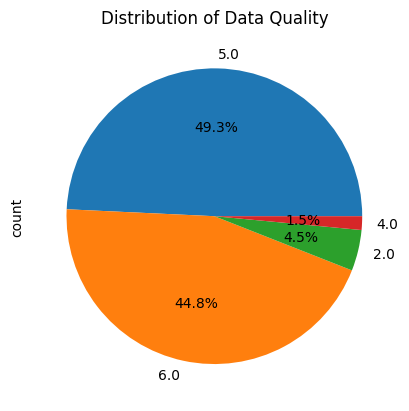

In [227]:
df["Data Quality"] = pd.to_numeric(df["Data Quality"], errors='coerce')
df["Data Quality"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Data Quality")
plt.show()

In [228]:
#the average fish resource footprint per region
fish_by_region = df.groupby("Region")["Fish Footprint"].mean()
print(fish_by_region)

Region
Africa                      0.093800
Asia-Pacific                0.232333
European Union              0.115833
Latin America               0.132424
Middle East/Central Asia    0.064348
North America               0.120000
Northern/Eastern Europe     0.060000
Name: Fish Footprint, dtype: float64


In [229]:
#how much urban land usage correlates with HDI
urban_by_hdi = df.groupby("HDI")["Urban Land"].mean()
print(urban_by_hdi.head())

HDI
0.34    0.0300
0.37    0.0400
0.39    0.0375
0.40    0.0500
0.41    0.0500
Name: Urban Land, dtype: float64


In [230]:
#the forest footprint for all countries in each region
total_forest_by_region = df.groupby("Region")["Forest Footprint"].sum()
print(total_forest_by_region)

Region
Africa                      16.120000
Asia-Pacific                12.342000
European Union              16.683333
Latin America               14.075455
Middle East/Central Asia     3.700000
North America                2.805000
Northern/Eastern Europe      5.530909
Name: Forest Footprint, dtype: float64


In [231]:
# Top 10 countries with the highest total ecological biocapacity
top_biocapacity = df.groupby("Country")["Total Biocapacity"].sum().nlargest(10)
print(top_biocapacity)

Country
French Guiana    111.35
Suriname          89.33
Guyana            66.58
Gabon             26.31
Bolivia           16.73
Australia         16.57
Canada            16.01
Mongolia          15.66
Finland           13.44
Congo             10.91
Name: Total Biocapacity, dtype: float64


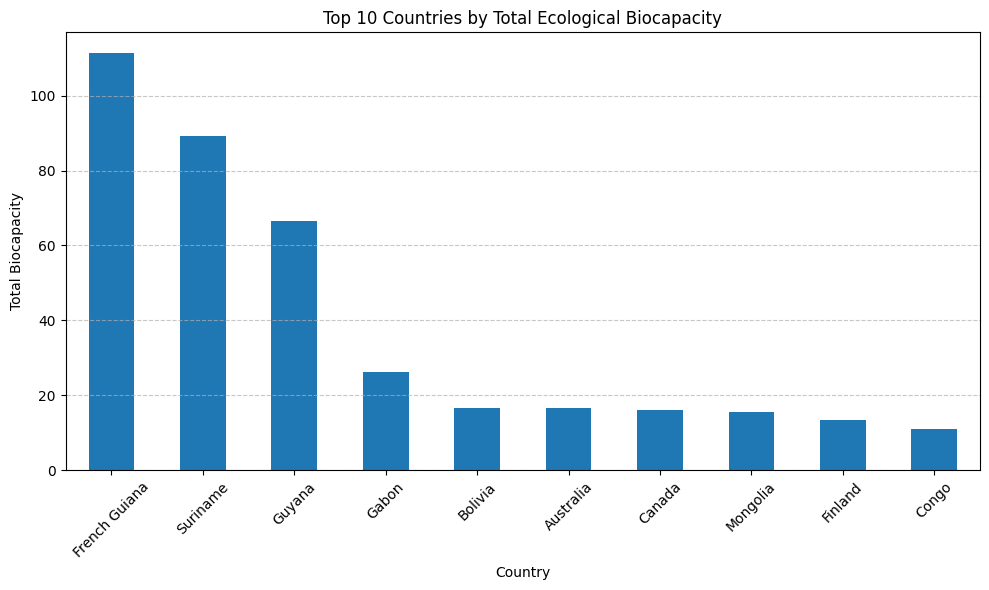

In [232]:
plt.figure(figsize=(10, 6))
top_biocapacity.plot(kind='bar')

plt.title("Top 10 Countries by Total Ecological Biocapacity")
plt.xlabel("Country")
plt.ylabel("Total Biocapacity")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

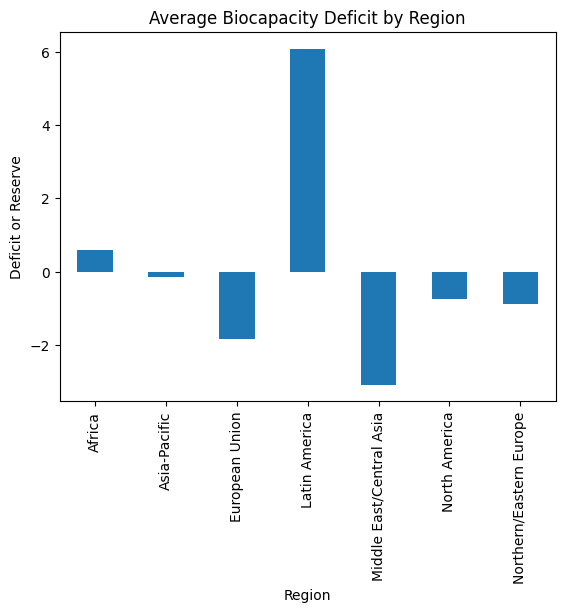

In [233]:
df.groupby("Region")["Biocapacity Deficit or Reserve"].mean().plot(kind="bar")
plt.title("Average Biocapacity Deficit by Region")
plt.ylabel("Deficit or Reserve")
plt.show()

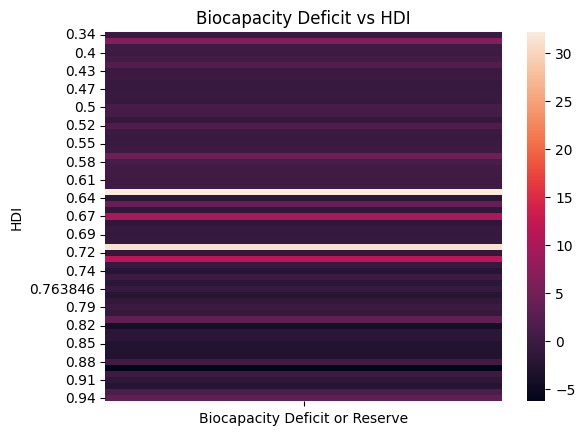

In [234]:
pivot = df.pivot_table(values="Biocapacity Deficit or Reserve", index="HDI", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Biocapacity Deficit vs HDI")
plt.show()